# Step #1 Load and Prepare the Data

Mean of Price:13276.710570731706


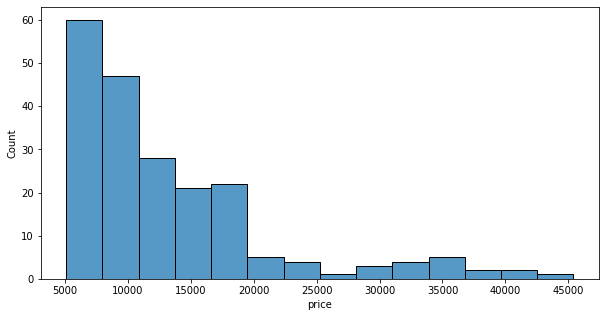

In [342]:
# A tutorial for this file is available at www.relataly.com

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_predict

# The Data is part of the Kaggle Competition: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
base_path = "data/sales/car_prices/train.csv"
df = pd.read_csv(base_path)

print("Mean of Price:" + str(df.price.mean()))

fig=plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price', bins='auto')
#plt.suptitle("Densitiy Plot of Car Price")
df.describe()
plt.show()

# Step #2 Data Preparation and Model Training

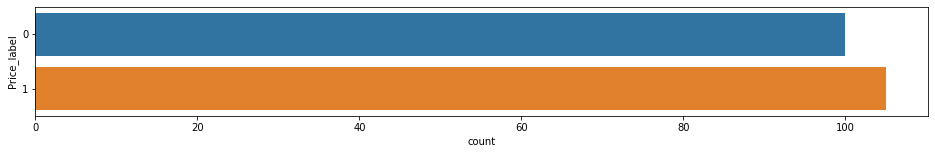

In [343]:
df["Price_label"] = [1 if x > 10000 else 0 for x in df["price"]]
plt.figure(figsize=(16,2))
fig = sns.countplot(y="Price_label", data=df)

In [344]:
# Select a small number of features that we use as input to the classification model
features = ['carwidth', 'carlength']
df_base = df[features + ['Price_label']]

# Separate labels from training data
X = df_base[features] #Training data
y = df_base['Price_label'] #Prediction label

# Split the data into x_train and y_train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [345]:
# Create the Random Forest Classifier
dfrst = RandomForestClassifier(n_estimators=3, max_depth=4, min_samples_split=6, class_weight='balanced')
ranfor = dfrst.fit(X_train, y_train)
y_pred = ranfor.predict(X_test)

# Step #3 Confusion Matrix and Metrics

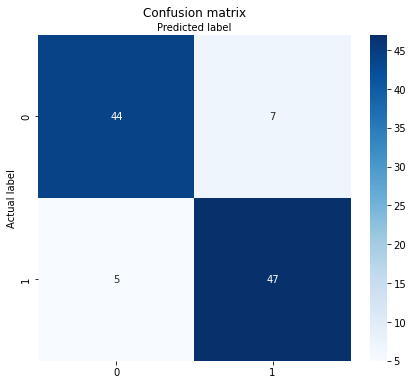

In [347]:
# Create heatmap from the confusion matrix
def createConfMatrix(class_names, matrix):
    class_names=[0, 1] 
    tick_marks = [0.5, 1.5]
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label'); plt.xlabel('Predicted label')
    plt.yticks(tick_marks, class_names); plt.xticks(tick_marks, class_names)
    
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
createConfMatrix(matrix=cnf_matrix, class_names=[0, 1])

In [348]:
# Calculate Error Metrics

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))

# Classification Report (Alternative)

results_log = classification_report(y_test, y_pred, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

Accuracy: 0.88
Precision: 0.87
Recall: 0.90
f1_score: 0.89
              precision    recall  f1-score     support
0              0.897959  0.862745  0.880000   51.000000
1              0.870370  0.903846  0.886792   52.000000
accuracy       0.883495  0.883495  0.883495    0.883495
macro avg      0.884165  0.883296  0.883396  103.000000
weighted avg   0.884031  0.883495  0.883429  103.000000


# Step #4 ROC Curve

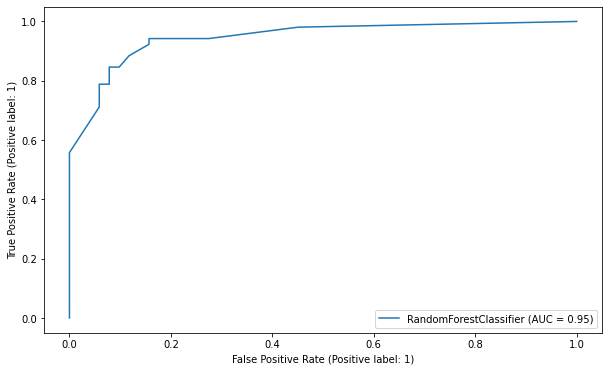

In [349]:
# Compute ROC curve
fig, ax = plt.subplots(figsize=(10, 6))
RocCurveDisplay.from_estimator(ranfor, X_test, y_test, ax=ax)
plt.show()

In [350]:
# Calculate Probability Scores and convert them into binary values
y_scores = cross_val_predict(ranfor, X_test, y_test, cv=3, method='predict_proba')
y_scores_binary = [1 if x[0] < 0.5 else 0 for x in y_scores]

# Calculate the area under the ROC curve
roc_auc_score(y_test, y_scores_binary)

0.806184012066365